In [ ]:
import os
import numpy as np
import cv2
from imageio import imread
import imageio
import random
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical

from tensorflow.keras.applications import VGG16, ResNet152V2, NASNetLarge, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
!git clone https://github.com/OctoDed/NN_demos.git
!unzip /content/NN_demos/cats_datset.zip -d /content/

fatal: destination path 'NN_demos' already exists and is not an empty directory.
Archive:  /content/NN_demos/cats_datset.zip
   creating: /content/valid/
   creating: /content/valid/SNOW LEOPARD/
  inflating: /content/valid/SNOW LEOPARD/4.jpg  
  inflating: /content/valid/SNOW LEOPARD/3.jpg  
  inflating: /content/valid/SNOW LEOPARD/1.jpg  
  inflating: /content/valid/SNOW LEOPARD/2.jpg  
  inflating: /content/valid/SNOW LEOPARD/5.jpg  
   creating: /content/valid/LIONS/
  inflating: /content/valid/LIONS/4.jpg  
  inflating: /content/valid/LIONS/3.jpg  
  inflating: /content/valid/LIONS/1.jpg  
  inflating: /content/valid/LIONS/2.jpg  
  inflating: /content/valid/LIONS/5.jpg  
   creating: /content/valid/JAGUAR/
  inflating: /content/valid/JAGUAR/4.jpg  
  inflating: /content/valid/JAGUAR/3.jpg  
  inflating: /content/valid/JAGUAR/1.jpg  
  inflating: /content/valid/JAGUAR/2.jpg  
  inflating: /content/valid/JAGUAR/5.jpg  
   creating: /content/valid/OCELOT/
  inflating: /content/valid

In [ ]:
def class_to_nums(clas):
  if(clas=='AFRICAN LEOPARD'):
    return 0
  elif(clas=='CARACAL'):
    return 1
  elif(clas=='CHEETAH'):
    return 2
  elif(clas=='CLOUDED LEOPARD'):
    return 3
  elif(clas=='JAGUAR'):
    return 4
  elif(clas=='LIONS'):
    return 5
  elif(clas=='OCELOT'):
    return 6
  elif(clas=='PUMA'):
    return 7
  elif(clas=='SNOW LEOPARD'):
    return 8
  elif(clas=='TIGER'):
    return 9

def get_set(source, size):
  classes=[]
  for Dir in sorted(os.listdir(source)):
      classes.append(Dir)

  print('Найденные классы:',classes)

  imgs=[]
  labels=[]

  for clas in classes:
      for fl in sorted(os.listdir(source+clas+'/')):
          try:
              imgPath=source+clas+'/'+fl
              img =np.array(cv2.resize(imread(imgPath),(size,size)))
              if (img.shape!=(size,size,3)):
                  continue
              img = tf.convert_to_tensor(img)
              img = tf.cast(img, tf.float32) / 255.0
              imgs.append(img)
              labels.append(class_to_nums(clas))
          except:
              continue

  imgs=np.array(imgs)
  labels=np.array(labels)

  return imgs, labels

def show_img(imgs, labels, classes, index, preds=None, mode='regular'):
  if (mode=='regular'):
    print(labels[index],classes[labels[index]])
    plt.imshow(imgs[index])
    plt.show()
    print()
  elif(mode=='test'):
    print('Предсказано -',preds[index],'истинное значение -', labels[index])
    print('Предсказано -',classes[preds[index]],'истинное значение -', classes[labels[index]])
    plt.imshow(imgs[i])
    plt.show()
    print()
  else:
    print('Неизвестное значение режима работы')

In [ ]:
size=256 #указываем размер изображений, который мы хотим обрабатывать

print('Считываем обучающие данные...')
source='/content/train/'
x_train, y_train = get_set(source, size)
print('Размерности обучающих данных:')
print(x_train.shape)
print(y_train.shape)
print('\n-----------------------------------\n')

print('Считываем валидационные данные...')
source='/content/valid/'
x_valid, y_valid = get_set(source, size)
print('Размерности валидационных данных:')
print(x_valid.shape)
print(y_valid.shape)
print('\n-----------------------------------\n')

print('Считываем тестовые данные...')
source='/content/test/'
x_test, y_test = get_set(source, size)
print('Размерности тестовых данных:')
print(x_test.shape)
print(y_test.shape)

Считываем обучающие данные...
Найденные классы: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']


<ipython-input-49-81280ea211e2>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img =np.array(cv2.resize(imread(imgPath),(size,size)))


Размерности обучающих данных:
(2339, 256, 256, 3)
(2339,)

-----------------------------------

Считываем валидационные данные...
Найденные классы: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']
Размерности валидационных данных:
(50, 256, 256, 3)
(50,)

-----------------------------------

Считываем тестовые данные...
Найденные классы: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']
Размерности тестовых данных:
(50, 256, 256, 3)
(50,)


--------train---------
3 CLOUDED LEOPARD


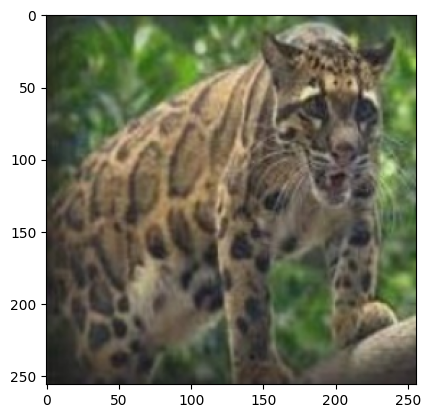


8 SNOW LEOPARD


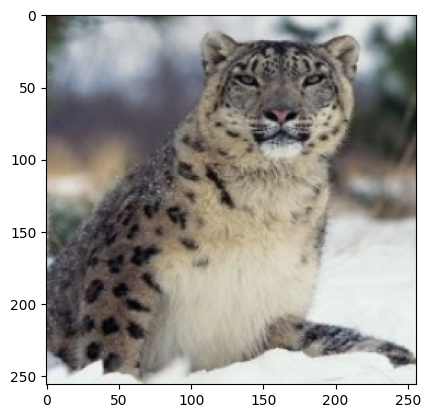


--------valid---------
5 LIONS


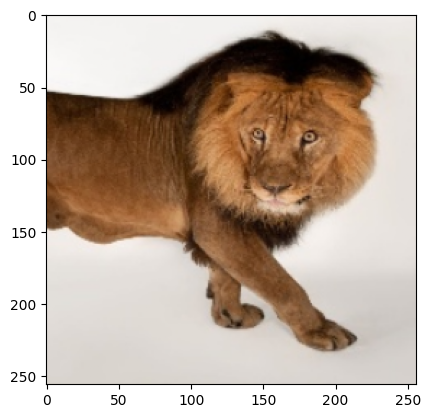


4 JAGUAR


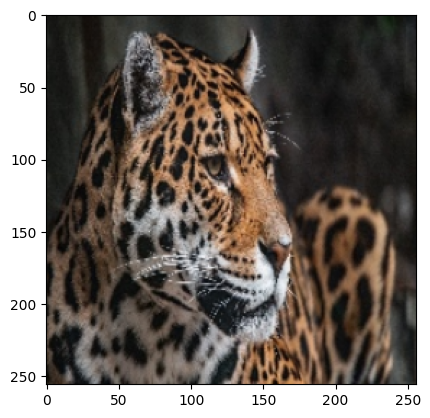


--------test---------
6 OCELOT


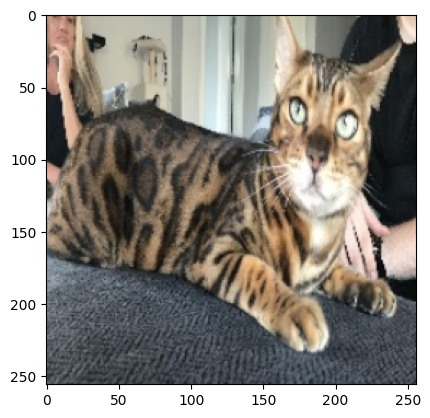


4 JAGUAR


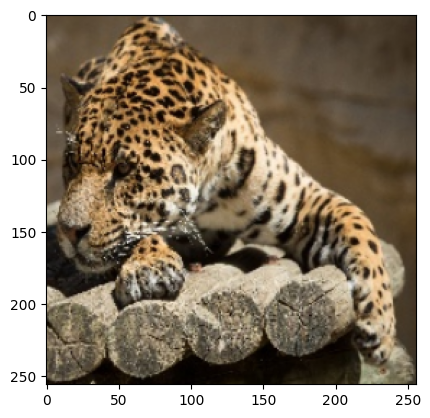

In [ ]:
print('--------train---------')
for i in range(2):
    num=random.randint(0,len(y_train)-1)
    show_img(x_train, y_train, classes, num)

print('--------valid---------')
for i in range(2):
    num=random.randint(0,len(y_valid)-1)
    show_img(x_valid, y_valid, classes, num)

print('--------test---------')
for i in range(2):
    num=random.randint(0,len(y_test)-1)
    show_img(x_test, y_test, classes, num)

In [ ]:
new_input = Input(shape=(size,size, 3))

vgg=VGG16(weights='imagenet',include_top=False)
model = models.Sequential()
model.add(tf.keras.layers.RandomFlip(input_shape=(size,size,3)))
model.add(tf.keras.layers.RandomRotation(factor=0.2))
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(classes),activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_2 (RandomRotation)   │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,910,410 (72.14 MB)

 Trainable params: 18,910,410 (72.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1,  mode='min', restore_best_weights= True)

callbacks= [early_stopping]

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid),
                    shuffle=True,callbacks=callbacks)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 50s 612ms/step - accuracy: 0.1293 - loss: 2.5019 - val_accuracy: 0.3000 - val_loss: 1.8124
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 588ms/step - accuracy: 0.2993 - loss: 1.8343 - val_accuracy: 0.6400 - val_loss: 1.1395
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 83s 606ms/step - accuracy: 0.4504 - loss: 1.4422 - val_accuracy: 0.6400 - val_loss: 0.9815
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 603ms/step - accuracy: 0.5820 - loss: 1.1547 - val_accuracy: 0.7800 - val_loss: 0.7205
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 604ms/step - accuracy: 0.6168 - loss: 1.0903 - val_accuracy: 0.6400 - val_loss: 0.9029
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 605ms/step - accuracy: 0.6761 - loss: 0.9209 - val_accuracy: 0.7800 - val_loss: 0.6006
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 604ms/step - accuracy: 0.7147 - loss: 0.8271 - val_accuracy: 0.7800 - val_loss: 0.5445
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 604ms/step - accuracy: 0.7401 - loss: 0.7487 - val_accu

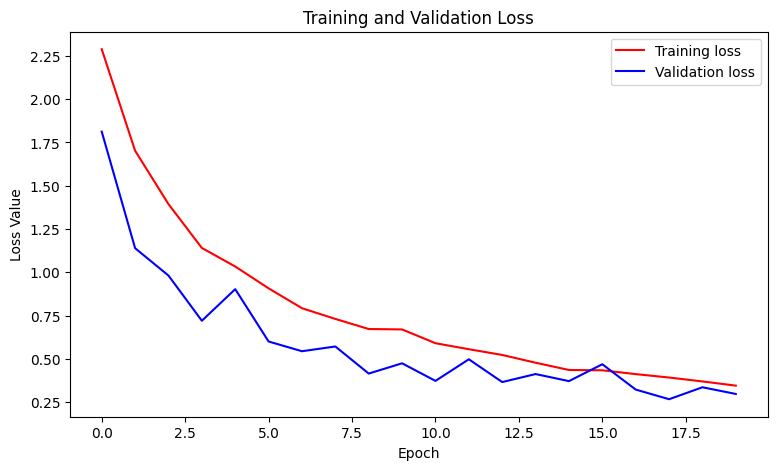

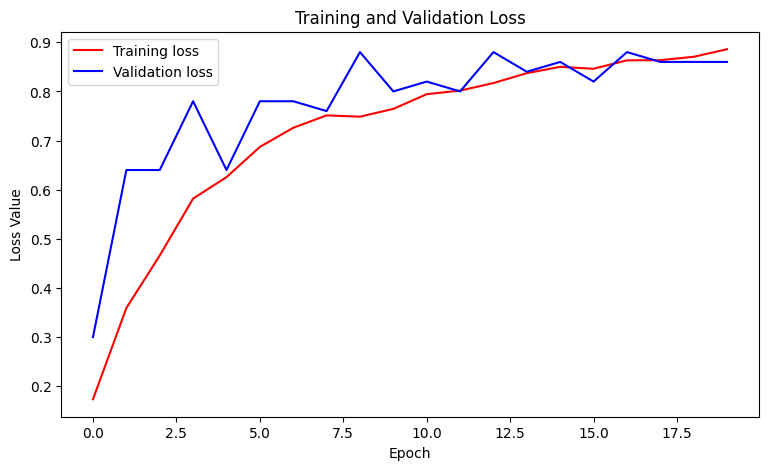

In [ ]:
# Получаем значения функции потерь на обучающей и тестовой выборках
loss = history.history['loss']
val_loss = history.history['val_loss']

# Получаем количество эпох обучения
epochs = range(len(loss))

# Строим график изменения функции потерь
plt.figure(figsize=(9, 5))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

plt.ylabel('Loss Value')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Получаем количество эпох обучения
epochs = range(len(loss))

# Строим график изменения точности
plt.figure(figsize=(9, 5))
plt.plot(epochs, acc, 'r', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5
           4       0.67      0.40      0.50         5
           5       1.00      1.00      1.00         5
           6       0.80      0.80      0.80         5
           7       1.00      1.00      1.00         5
           8       0.80      0.80      0.80         5
           9       0.80      0.80      0.80         5

    accuracy                           0.84        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.85      0.84      0.84        50



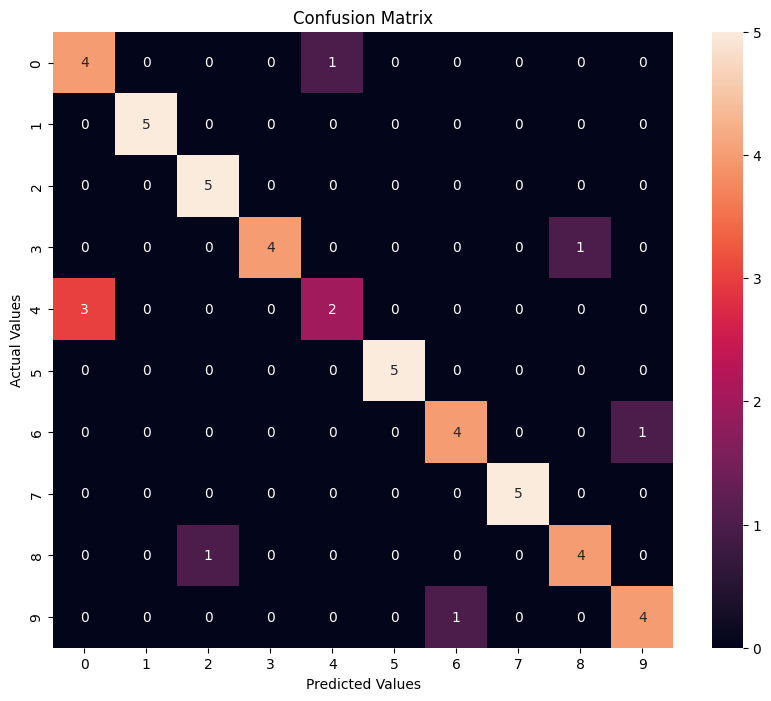

In [ ]:
from sklearn import metrics
import seaborn as sns

tmp=model.predict(x_test)

# Приводим предсказания к виду одномерного массива, выбирая в качестве верного класс с наибольшей уверенностью
pred=[]
for i in range(0,len(tmp)):
    max=np.amax(tmp[i])
    for k in range(0,len(tmp[i])):
        if (tmp[i][k]==max):
            pred.append(k)
pred=np.asarray(pred)

confusion_matrix = metrics.confusion_matrix(y_test, pred)

# Формируем отчёт по метрикам на основе предсказаний и эталонных значений
report = metrics.classification_report(y_test, pred)
print(report)

# Выводим матрицу соотношения классов и предсказаний
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Предсказано - 2 истинное значение - 2
predicПредсказаноted - CHEETAH истинное значение - CHEETAH


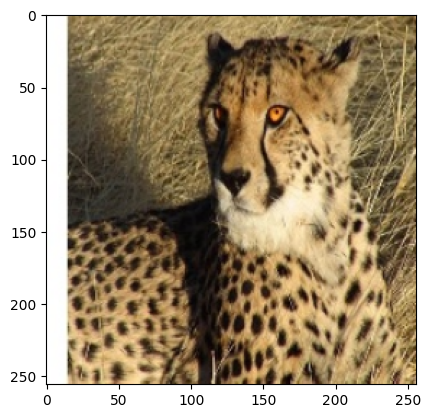


Предсказано - 7 истинное значение - 7
predicПредсказаноted - PUMA истинное значение - PUMA


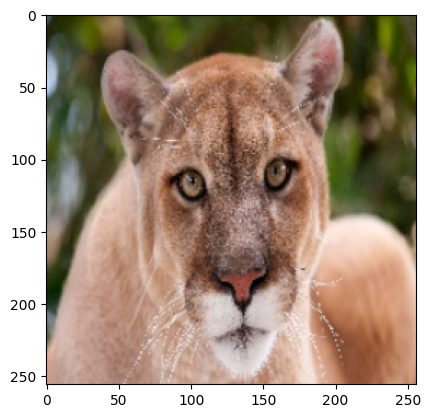


Предсказано - 5 истинное значение - 5
predicПредсказаноted - LIONS истинное значение - LIONS


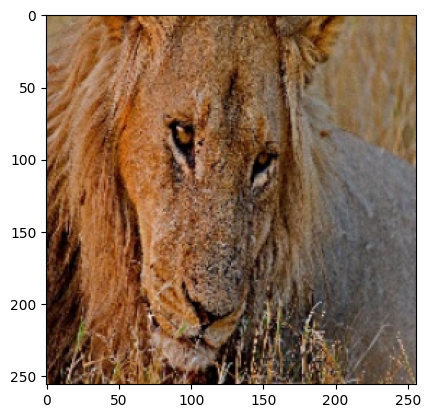


Предсказано - 7 истинное значение - 7
predicПредсказаноted - PUMA истинное значение - PUMA


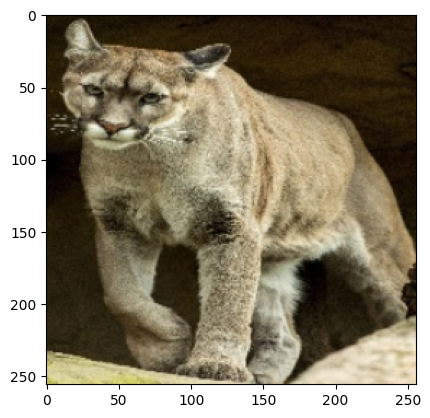


Предсказано - 8 истинное значение - 8
predicПредсказаноted - SNOW LEOPARD истинное значение - SNOW LEOPARD


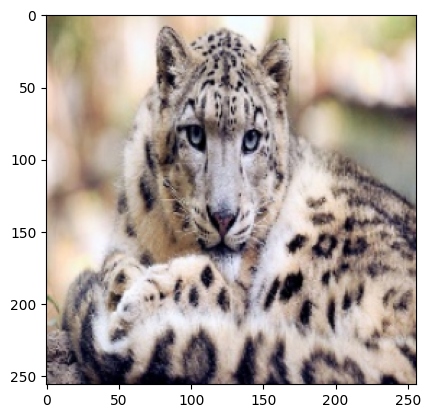


Предсказано - 2 истинное значение - 2
predicПредсказаноted - CHEETAH истинное значение - CHEETAH


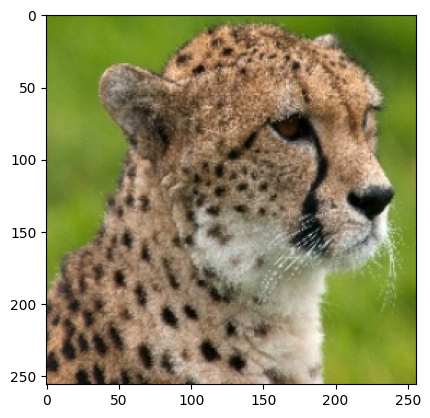


Предсказано - 2 истинное значение - 8
predicПредсказаноted - CHEETAH истинное значение - SNOW LEOPARD


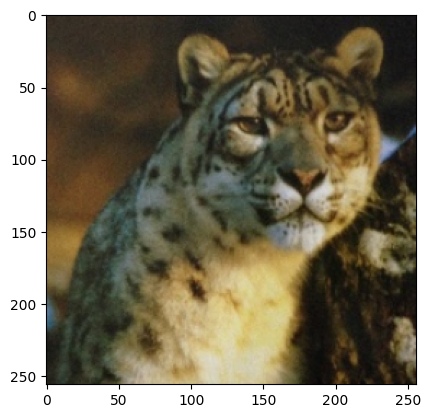


Предсказано - 5 истинное значение - 5
predicПредсказаноted - LIONS истинное значение - LIONS


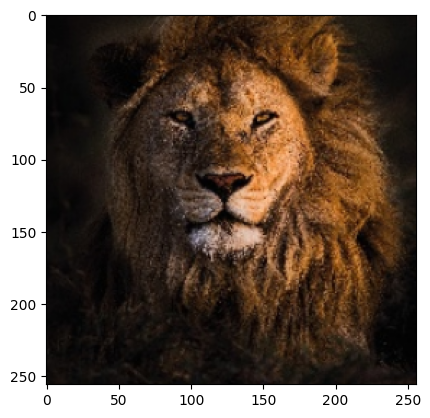


Предсказано - 2 истинное значение - 2
predicПредсказаноted - CHEETAH истинное значение - CHEETAH


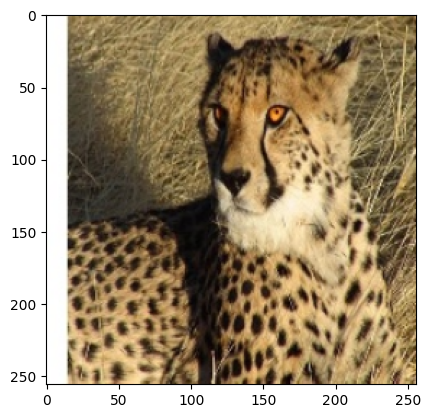


Предсказано - 1 истинное значение - 1
predicПредсказаноted - CARACAL истинное значение - CARACAL


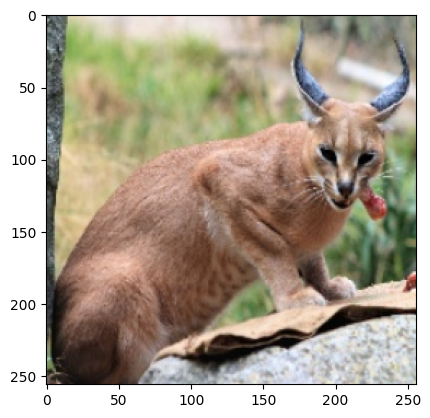

In [ ]:
nums=np.random.randint(0,50,10)
for i in nums:
  show_img(x_test, y_test, classes, i, pred, 'test')